In [1]:
import csv
import os
import pathlib
from collections import namedtuple
from time import time
from typing import List, Tuple, Optional
from random import randint, seed

import networkx as nx
import numpy as np
import torch
import torch_geometric.utils as tutils
from torch_geometric.data import Data
from torch_geometric.datasets import TUDataset
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

from collections import Counter
from utils import load_singleton_graphs_from_TUDataset



import warnings
warnings.filterwarnings('ignore')

In [2]:
datasets = ['ENZYMES', 'DD', 'MSRC_9', 'MSRC_21',
            'Mutagenicity', 'NCI1', 'NCI109', 'PROTEINS_full'
            'COLLAB', 'NCI-H23H', 'REDDIT-BINARY', 'REDDIT-MULTI-5K', 'REDDIT-MULTI-12K']

In [3]:
dataset = 'COLLAB'
node_attr = 'x'
G, y = load_singleton_graphs_from_TUDataset(
        root=os.path.join('root', dataset),
        dataset=dataset,
        node_attr=node_attr
    )

individual_classes = [cls for cls, _ in sorted(Counter(y).items())]
indices_per_class = [y == cls for cls in individual_classes]


Convert graph to singleton: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 12577.36it/s]


In [4]:

n_components = 2
perplexities = [5, 30, 50, 100]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(G)
G = scaler.transform(G)

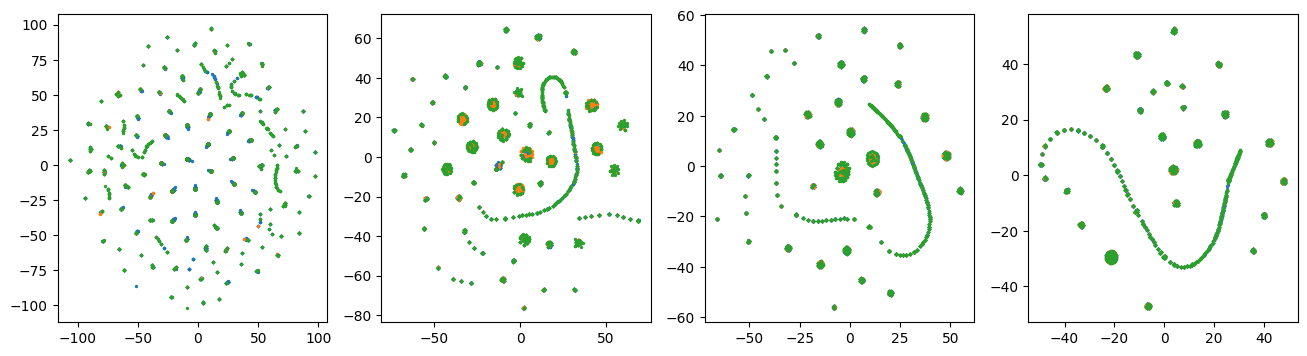

In [5]:
(fig, subplots) = plt.subplots(1, len(perplexities), figsize=(4*len(perplexities), 4))
for perplexity, ax in zip(perplexities, subplots.flat):
    
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=1000,
    )
    Y = tsne.fit_transform(np.array(G))
    
    for cls in indices_per_class:
        ax.scatter(Y[cls, 0], Y[cls, 1], s=2)
    

KeyboardInterrupt: 

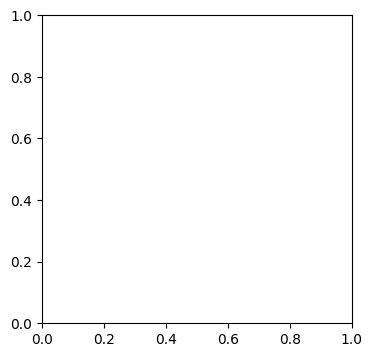

In [57]:
(fig, ax) = plt.subplots(1, 1, figsize=(4, 4))

n_components = 2

mds = manifold.MDS(
        n_components=n_components,
    )
Y = mds.fit_transform(np.array(G))
    
for cls in indices_per_class:
    ax.scatter(Y[cls, 0], Y[cls, 1])

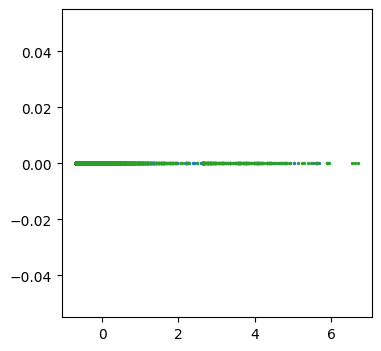

In [73]:
(fig, ax) = plt.subplots(1, 1, figsize=(4, 4))

n_components = 2

isomap = manifold.Isomap(
        n_components=n_components,
        n_jobs=10
    )
Y = isomap.fit_transform(np.array(G))
    
for cls in indices_per_class:
    ax.scatter(Y[cls, 0], Y[cls, 1], s=2)